In the last Example Class, we have identified and analyzed some of the most relevant numeric variables in this dataset,
which may affect the sale price of a house, and hence, will probably be most relevant in predicting “SalePrice”. In this
Example Class, we will extract those numeric variables one-by-one and perform Linear Regression to predict “SalePrice”.


## Problem 1 : Predicting SalePrice using GrLivArea

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.

Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames

`houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])`
`Above ground living area in SqFt`

`'houseSalePrice = pd.DataFrame(houseData['SalePrice'])` 
`Sale Price of house in US Dollars`

In [123]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#### a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.
Remember the correlation coefficient between these two variables from the last Example Class? Check again.


In [124]:
data = pd.read_csv('train.csv')

houseGrLivArea = pd.DataFrame(data['GrLivArea'])
houseSalePrice = pd.DataFrame(data['SalePrice'])

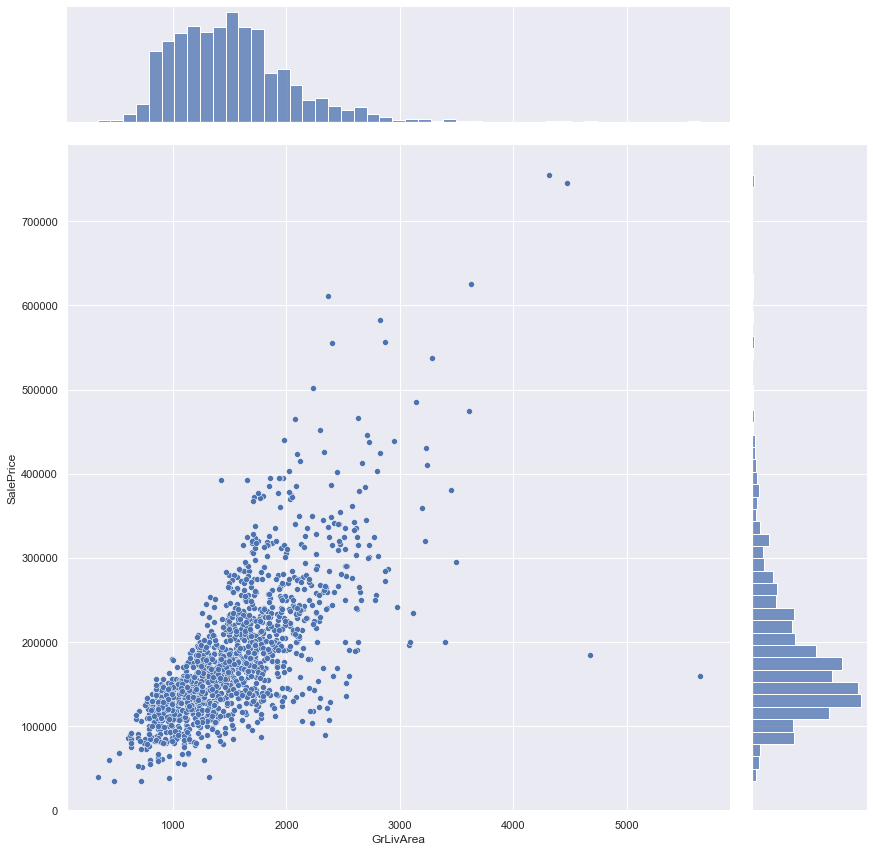

In [125]:
joint = pd.concat([houseGrLivArea, houseSalePrice], axis = 1).reindex(houseGrLivArea.index)
sb.jointplot(data=joint, x='GrLivArea', y='SalePrice', height=12)


Comment:

#### b) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression


In [126]:
# Import sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.
Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)
Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)

In [127]:
houseGrLivArea_train, houseGrLivArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice, train_size=1100/1460)

# Train Set: 1100 rows
#houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
#houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

# Test Set: 360 rows
#houseGrLivArea_test = pd.DataFrame(houseGrLivArea[:360])
#houseSalePrice_test = pd.DataFrame(houseSalePrice[:360])

#Check Sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set:", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set: (360, 1) (360, 1)


#### d) Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

In [128]:
# Create a Linear Regression object
linreg = LinearRegression()
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

#### e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

In [129]:
# Coefficients of the Linear Regression line
print('Coefficients \t: a = ', linreg.coef_)
print('Intercept \t: b = ', linreg.intercept_)


Coefficients 	: a =  [[106.43768935]]
Intercept 	: b =  [19840.55343879]


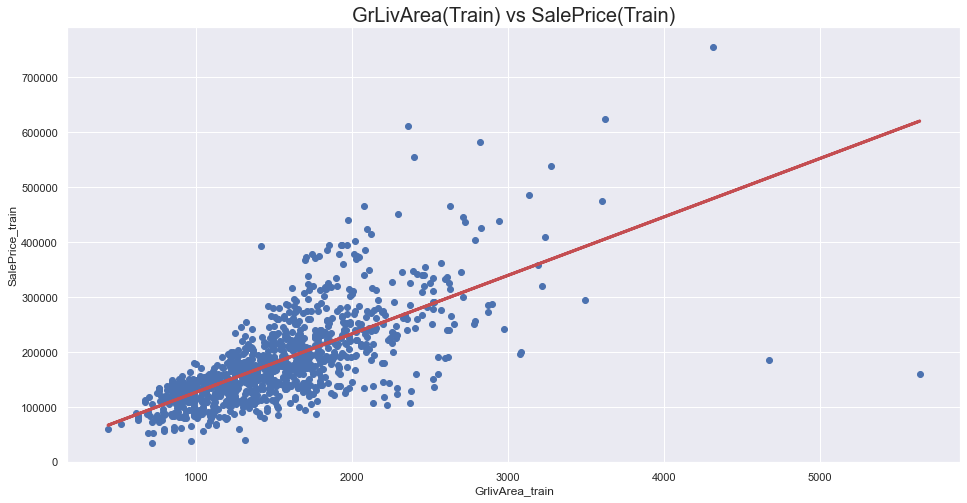

In [130]:
#Formula for the Regression Line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.xlabel('GrlivArea_train')
plt.ylabel('SalePrice_train')
plt.title("GrLivArea(Train) vs SalePrice(Train)", size=20)
plt.show()

#### f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy

In [131]:
# Predict SalePrice corresponding to houseGrLivArea_test
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)

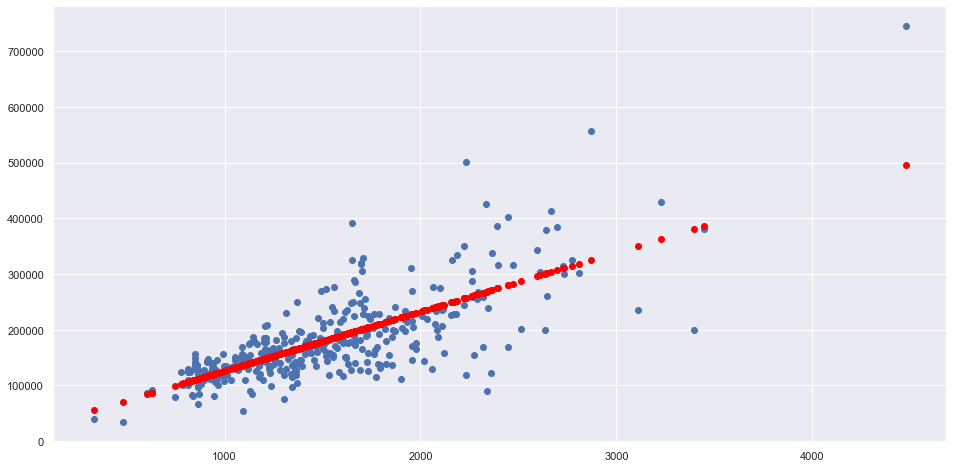

In [132]:
# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test)
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color='red') # Predicted test SalePrice

plt.show()

#### g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

Goodness of Fit of the Model:

Check how good the predictions are on the Train Set.

Metrics : Explained Variance and Mean Squared Error.

Note:
The higher the Explained Variance, the better fit it is

In [133]:
print('Goodness of Fit\t\t\t: Train Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseGrLivArea_train, houseSalePrice_train))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))

Goodness of Fit			: Train Data
Explained Variance(R^2)		: 0.48555988567668273
Mean Squared Error (MSE)	: 3288100462.499424


In [134]:
print('Goodness of Fit\t\t\t: Test Data')
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))

Goodness of Fit			: Test Data
Explained Variance (R^2) 	: 0.5554854245894629
Mean Squared Error (MSE) 	: 2687571403.1158876


## Problem 2 : Predicting SalePrice using Other Variables
Perform all the above steps on `SalePrice` against each of the variables `LotArea`, `TotalBsmtSF`, `GarageArea`
one-by-one to perform individual Linear Regressions. 
Discuss with your Friends about the models, compare and contrast
the Explained Variance (R^2), check the predictions, and determine which model is the best to predict 'SalePrice'.

In [118]:
data = pd.read_csv('train.csv')

houseSalePrice = pd.DataFrame(data['SalePrice'])

#### SalePrice against LotArea

Coefficient	: a= [[1.77570278]]
Intercept	: b= [162406.03160103]


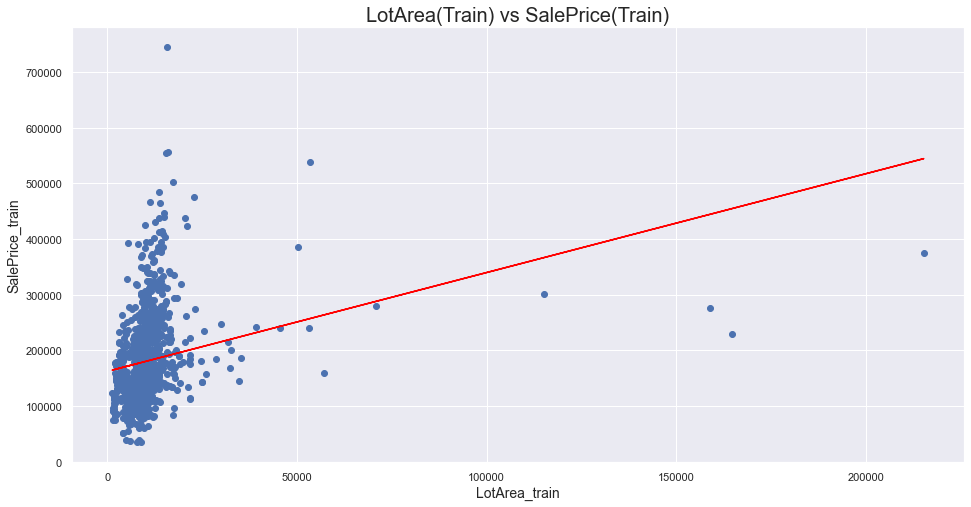

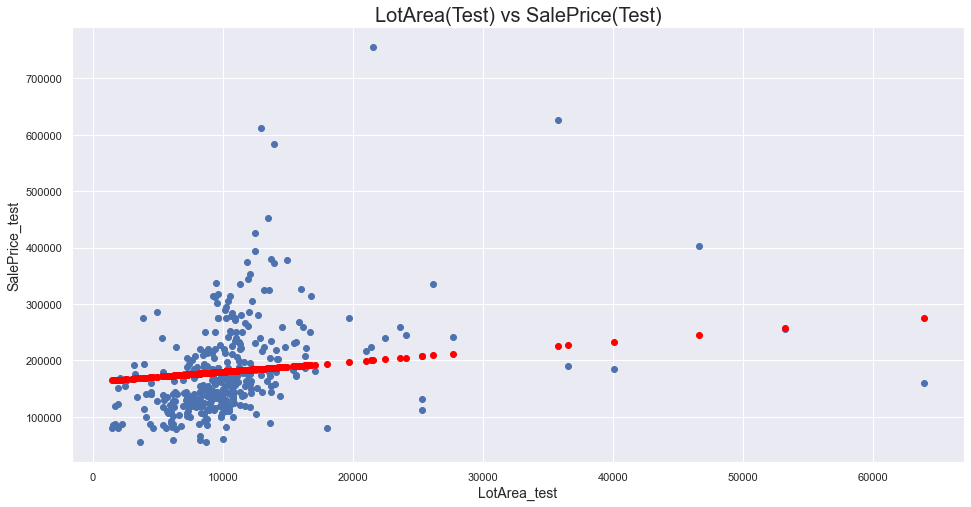

Goodness of Fit			: Train Data
Explained Variance(R^2)		: 0.06265394800652224
Mean Squared Error (MSE)	: 5637222447.061404


Goodness of Fit			: Test Data
Explained Variance(R^2)		: 0.08140386891109008
Mean Squared Error (MSE)	: 6614707280.752457


In [119]:
houseLotArea = pd.DataFrame(data['LotArea']).reindex(houseLotArea.index)
houseLotArea_train, houseLotArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseLotArea, houseSalePrice, train_size=1100/1460)

linreg = LinearRegression()
linreg.fit(houseLotArea_train,houseSalePrice_train)

print('Coefficient\t: a=', linreg.coef_)
print('Intercept\t: b=', linreg.intercept_)

#Train
houseSalePrice_train_pred = linreg.predict(houseLotArea_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(houseLotArea_train, houseSalePrice_train_pred, color='red') # Predicted test SalePrice
plt.xlabel('LotArea_train', size=14)
plt.ylabel('SalePrice_train', size=14)
plt.title("LotArea(Train) vs SalePrice(Train)", size=20)
plt.show()

#Test

houseSalePrice_test_pred = linreg.predict(houseLotArea_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test)
plt.scatter(houseLotArea_test, houseSalePrice_test_pred, color='red') # Predicted test SalePrice
plt.xlabel('LotArea_test', size=14)
plt.ylabel('SalePrice_test', size=14)
plt.title("LotArea(Test) vs SalePrice(Test)", size=20)
plt.show()

print('Goodness of Fit\t\t\t: Train Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseLotArea_train, houseSalePrice_train))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))

print('\n')

print('Goodness of Fit\t\t\t: Test Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseLotArea_test, houseSalePrice_test))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))

#### SalePrice against TotalBsmtSF

Coefficient	: a= [[121.00205817]]
Intercept	: b= [53133.04802974]


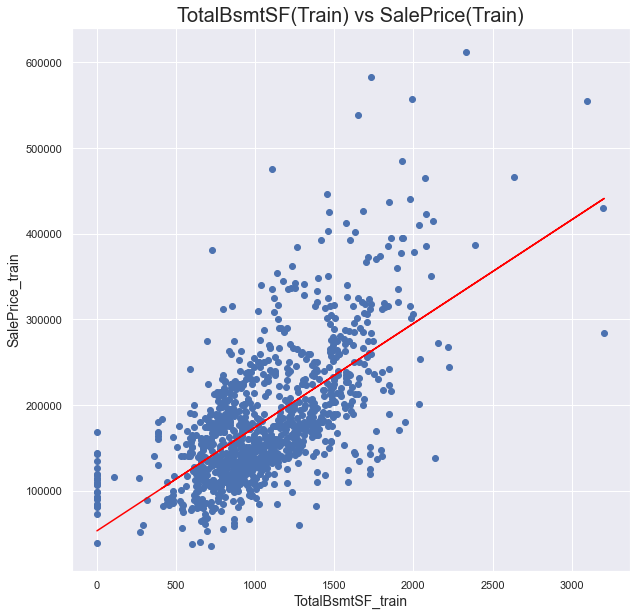

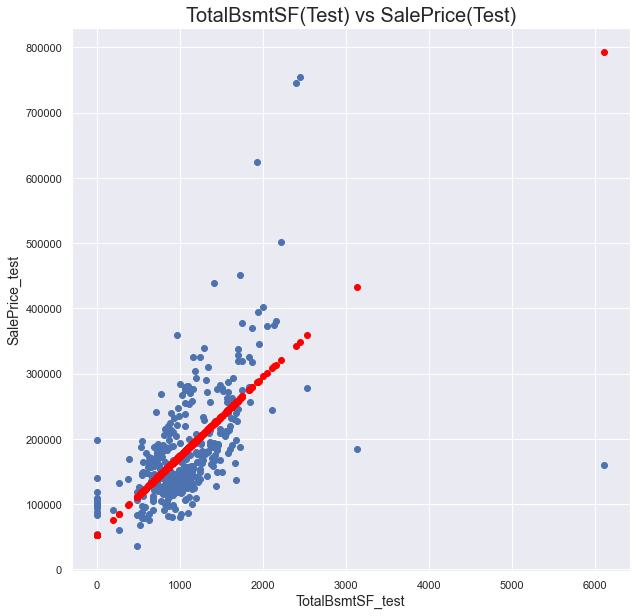

Goodness of Fit			: Train Data
Explained Variance(R^2)		: 0.41497048514757096
Mean Squared Error (MSE)	: 3456355079.8563313


Goodness of Fit			: Test Data
Explained Variance(R^2)		: 0.2739659004964614
Mean Squared Error (MSE)	: 5463429258.645738


In [120]:
houseTotalBsmtSF = pd.DataFrame(data['TotalBsmtSF']).reindex(houseTotalBsmtSF.index)
houseTotalBsmtSF_train, houseTotalBsmtSF_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseTotalBsmtSF, houseSalePrice, train_size=1100/1460)

linreg = LinearRegression()
linreg.fit(houseTotalBsmtSF_train,houseSalePrice_train)

print('Coefficient\t: a=', linreg.coef_)
print('Intercept\t: b=', linreg.intercept_)

#Train
houseSalePrice_train_pred = linreg.predict(houseTotalBsmtSF_train)

f = plt.figure(figsize=(10, 10))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.plot(houseTotalBsmtSF_train, houseSalePrice_train_pred, color='red') # Predicted test SalePrice
plt.xlabel('TotalBsmtSF_train', size=14)
plt.ylabel('SalePrice_train', size=14)
plt.title("TotalBsmtSF(Train) vs SalePrice(Train)", size=20)
plt.show()

#Test

houseSalePrice_test_pred = linreg.predict(houseTotalBsmtSF_test)

f = plt.figure(figsize=(10, 10))
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test)
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test_pred, color='red') # Predicted test SalePrice
plt.xlabel('TotalBsmtSF_test', size=14)
plt.ylabel('SalePrice_test', size=14)
plt.title("TotalBsmtSF(Test) vs SalePrice(Test)", size=20)
plt.show()

print('Goodness of Fit\t\t\t: Train Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseTotalBsmtSF_train, houseSalePrice_train))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))

print('\n')

print('Goodness of Fit\t\t\t: Test Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseTotalBsmtSF_test, houseSalePrice_test))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))

#### SalePrice against GarageArea

Coefficient	: a= [[242.21736212]]
Intercept	: b= [67204.58284685]


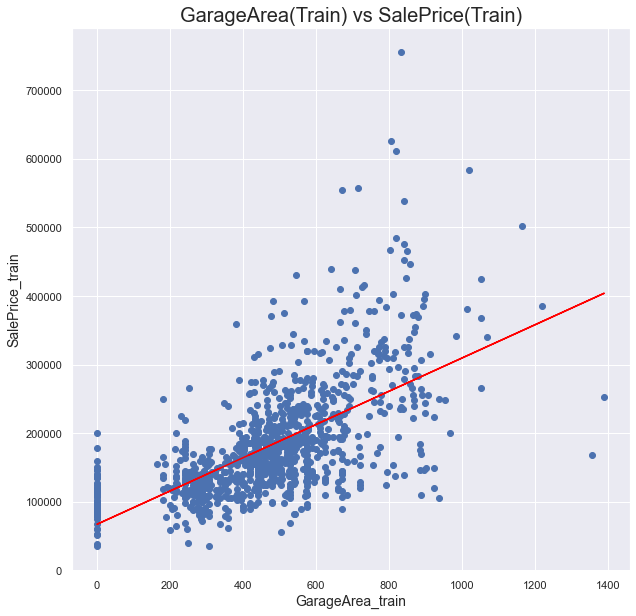

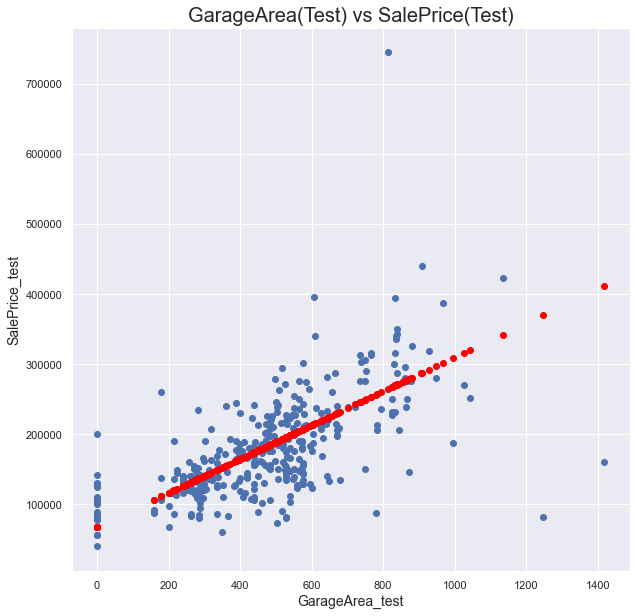

Goodness of Fit			: Train Data
Explained Variance(R^2)		: 0.389273317807479
Mean Squared Error (MSE)	: 4049492157.887097


Goodness of Fit			: Test Data
Explained Variance(R^2)		: 0.3801572806780549
Mean Squared Error (MSE)	: 3286564412.8102403


In [121]:
houseGarageArea = pd.DataFrame(data['GarageArea']).reindex(houseGarageArea.index)
houseGarageArea_train, houseGarageArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseGarageArea, houseSalePrice, train_size=1100/1460)

linreg = LinearRegression()
linreg.fit(houseGarageArea_train,houseSalePrice_train)

print('Coefficient\t: a=', linreg.coef_)
print('Intercept\t: b=', linreg.intercept_)

#Train
houseSalePrice_train_pred = linreg.predict(houseGarageArea_train)

f = plt.figure(figsize=(10, 10))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.plot(houseGarageArea_train, houseSalePrice_train_pred, color='red') # Predicted test SalePrice
plt.xlabel('GarageArea_train', size=14)
plt.ylabel('SalePrice_train', size=14)
plt.title("GarageArea(Train) vs SalePrice(Train)", size=20)
plt.show()

#Test

houseSalePrice_test_pred = linreg.predict(houseGarageArea_test)

f = plt.figure(figsize=(10, 10))
plt.scatter(houseGarageArea_test, houseSalePrice_test)
plt.scatter(houseGarageArea_test, houseSalePrice_test_pred, color='red') # Predicted test SalePrice
plt.xlabel('GarageArea_test', size=14)
plt.ylabel('SalePrice_test', size=14)
plt.title("GarageArea(Test) vs SalePrice(Test)", size=20)
plt.show()

print('Goodness of Fit\t\t\t: Train Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseGarageArea_train, houseSalePrice_train))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_train, houseSalePrice_train_pred))

print('\n')

print('Goodness of Fit\t\t\t: Test Data')
print('Explained Variance(R^2)\t\t:', linreg.score(houseGarageArea_test, houseSalePrice_test))
print('Mean Squared Error (MSE)\t:', mean_squared_error(houseSalePrice_test, houseSalePrice_test_pred))